All of this code can also be found on my github as an actual ipynb file. Highly recomend you read it there: https://github.com/NathanDonagi/NYT-Game-Solvers/blob/main/Projects.ipynb

This is the start of the Wordle solver. It uses a highly optimized DFS to check all possible guesses (hard mode) and get the optimal one.

In [ ]:
!pip install quickle

In [ ]:
!curl -O https://raw.githubusercontent.com/NathanDonagi/NYT-Game-Solvers/main/answers.txt
!curl -O https://raw.githubusercontent.com/NathanDonagi/NYT-Game-Solvers/main/wordlist.txt

In [ ]:
from collections import defaultdict
import quickle
import os

with open('wordlist.txt', 'r') as f:
    word_list = f.read().splitlines()

with open('answers.txt', 'r') as f:
    answer_list = f.read().splitlines()

pairings = defaultdict(lambda: {})

def get_result(answer, guess):
    if answer in pairings and guess in pairings[answer]:
        return pairings[answer][guess]
    out = ["b"] * 5
    a_count = defaultdict(lambda: 0)
    g_count = defaultdict(lambda: 0)
    for a, b in zip(answer, guess):
        a_count[a] += 1
        g_count[b] += 1

    for i, (a, b) in enumerate(zip(answer, guess)):
        if a == b:
            out[i] = 'g'
            a_count[a] -= 1
            g_count[b] -= 1

    for i, b in enumerate(guess):
        if out[i] == 'g':
            continue
        if a_count[b]:
            a_count[b] -= 1
            out[i] = 'y'
    return "".join(out)

In [ ]:
if os.path.exists('pairings.pickle'):
    print("precompute exists, begun reading")
    with open('pairings.pickle', 'rb') as f:
        pairings = quickle.loads(f.read())
    print("precompute loaded")
else:
    for answer in word_list:
        print(answer)
        for guess in word_list:
            res = get_result(answer, guess)
            pairings[answer][guess] = res
            if not res in pairings[guess]:
                pairings[guess][res] = []
            pairings[guess][res].append(answer)
    with open('pairings.pickle', 'wb') as f:
        f.write(quickle.dumps(dict(pairings)))
    print("precompute finished")


In [5]:
mem1 = {}
mem2 = {}

def score_guess(guess, prev_guesses, possible_guesses, possible_answers, mn): 
    s = 0
    for answer in possible_answers:
        if s>=mn:
            return s

        res = get_result(answer, guess)
        if res == 'ggggg':
           continue
    
        if (possible_guesses, possible_answers, guess, res) not in mem2:
            mem2[(possible_guesses, possible_answers, guess, res)] = (tuple(filter(lambda x: x in pairings[guess][res], possible_guesses)), tuple(filter(lambda x: x in pairings[guess][res], possible_answers)))
        
        possible_next_guesses, possible_next_answers = mem2[(possible_guesses, possible_answers, guess, res)]
        if len(possible_next_guesses) == len(possible_guesses):
            return float('inf')
        s += score(prev_guesses, possible_next_guesses, possible_next_answers)[0]
    return s
    
def score(prev_guesses, possible_guesses, possible_answers):
    if (possible_guesses, possible_answers) in mem1:
        return mem1[(possible_guesses, possible_answers)]
    if len(possible_answers) == 1:
        mem1[(possible_guesses, possible_answers)] = 1, possible_answers[0]
        return mem1[(possible_guesses, possible_answers)]
    if len(prev_guesses) > 7:
        return float('inf'), None

    mn, best = float('inf'), None
    
    for guess in possible_answers+tuple(filter(lambda x: x in possible_answers, possible_guesses)):
        temp = score_guess(guess, prev_guesses+(guess,), possible_guesses, possible_answers, mn)
        if temp < mn:
            mn = temp
            best = guess
        if mn == 0:
            break

    mem1[(possible_guesses, possible_answers)] = 1+mn/len(possible_answers), best
    return  mem1[(possible_guesses, possible_answers)]

In [6]:
def get_next_guess(guesses):
    possible_guesses = word_list
    possible_answers = answer_list
    for guess, res in guesses:
        if res not in pairings[guess]:
            pairings[guess][res] = []
        possible_guesses = tuple(filter(lambda x: x in pairings[guess][res], possible_guesses))
        possible_answers = tuple(filter(lambda x: x in pairings[guess][res], possible_answers)) 
        if res == 'ggggg':
            return 0, None
    print(len(possible_guesses), len(possible_answers))
    out = score(('salet',), possible_guesses, possible_answers)
    # print(out, possible_guesses, possible_answers)
    return out

def solve(answer):
    if answer == 'salet':
        return 1
    guesses = ['salet']
    # print('first')
    temp = get_next_guess([(guess, get_result(answer, guess)) for guess in guesses])[1]
    while temp != answer:
        temp = get_next_guess([(guess, get_result(answer, guess)) for guess in guesses])[1]
        print(temp)
        if temp in guesses:
            raise NotImplementedError
        guesses.append(temp)
    # print(guesses)
    return len(guesses)

In [7]:
def get_next_guess(guesses):
    if not guesses :
        return 3.5085,'salet'
    possible_guesses = word_list
    possible_answers = answer_list
    for guess, res in guesses:
        if res not in pairings[guess]:
            pairings[guess][res] = []
        possible_guesses = tuple(filter(lambda x: x in pairings[guess][res], possible_guesses))
        possible_answers = tuple(filter(lambda x: x in pairings[guess][res], possible_answers)) 
        if res == 'ggggg':
            return 0, None
    print(len(possible_guesses), len(possible_answers))
    out = score(('salet',), possible_guesses, possible_answers)
    # print(out, possible_guesses, possible_answers)
    return out

def solve(answer):
    if answer == 'salet':
        return 1
    guesses = ['salet']
    # print('first')
    temp = get_next_guess([(guess, get_result(answer, guess)) for guess in guesses])[1]
    while temp != answer:
        temp = get_next_guess([(guess, get_result(answer, guess)) for guess in guesses])[1]
        print(temp)
        if temp in guesses:
            raise NotImplementedError
        guesses.append(temp)
    # print(guesses)
    return len(guesses)

In [ ]:
#sample usage for the Wordle on April 14th, answer: blimp
print(get_next_guess([])[1])
print(get_next_guess([('salet', 'bbybb')])[1])
print(get_next_guess([('salet', 'bbybb'), ('cloud', 'bgbbb')])[1])
print(get_next_guess([('salet', 'bbybb'), ('cloud', 'bgbbb'), ('bling', 'gggbb')])[1])

This is the start of the Connections solver, it uses semantic text similarity (sts) and a greedy algorithm to cluster the words into groups of 4.

In [ ]:
!pip install numpy
!pip install google-generativeai

In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = 'enter your key here'

In [ ]:
import numpy as np
import google.generativeai as genai
import os

GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

def similarity(a, b):
  return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

def get_embeddings(content):
  result = genai.embed_content(
    model="models/embedding-001",
    content=content,
    task_type="semantic_similarity")
  return result['embedding']

In [ ]:
def score(x, content, dt):
  k1,k2,k3,k4 = x
  c1,c2,c3,c4 = content[k1],content[k2],content[k3],content[k4]
  s = 0
  for x,y in [(c1,c2),(c1,c3),(c1,c4),(c2,c3),(c2,c4),(c3,c4)]:
    s += dt[x][y]
  return s

def score_list(l, content, dt):
  return sum([score(l[i:i+4], content, dt) for i in range(0,16,4)])

def swap(l,i,j):
  return l[:i] + [l[j]] + l[i+1:j] + [l[i]] + l[j+1:]

def get_poss(current_guess):
  poss = []
  for j in range(4):
    for i in range(j):
      for a in range(4):
        for b in range(4):
          poss.append(swap(current_guess, 4*i+a, 4*j+b))
  return poss

def get_best(grid):
  content = []
  for row in grid:
    content += row
  embeddings = get_embeddings(content)
  embeddings = [np.array(x) for x in embeddings]

  from collections import defaultdict
  def def_value():
    return {}

  dt = defaultdict(def_value)

  for i in range(len(content)):
    for j in range(i):
      dt[content[i]][content[j]] = similarity(embeddings[i], embeddings[j])
      dt[content[j]][content[i]] = similarity(embeddings[i], embeddings[j])

  current_guess = list(range(16))

  for _ in range(20):
    poss = get_poss(current_guess)
    poss = [(score_list(l, content, dt), l) for l in poss]
    poss.sort(reverse = True)
    current_guess = poss[0][1]

  poss = [tuple(x[1]) for x in poss]
  seen = set()
  seen_add = seen.add
  poss = [x for x in poss if not (x in seen or seen_add(x))]

  for row in [poss[0][i:i+4] for i in range(0,16,4)]:
    print([content[g] for g in row])

In [ ]:
#sample usage
grid = [["Honey", "Brown", "Corset", "Mineral"], ["Spring", "Slip", "Teddy", "Wasp"], ["Fall", "Hourglass", "Tap", "Boo-Boo"], ["Still", "Spill", "Diabolo", "Trip"]]
get_best(grid)

This is the start of the Strands solver. It functions similarily to the wordle solver, using a dfs to generate all possible solved boards. It relies on the fact that the spangram cuts the board, and therefore the search space in half to efficiently solve.

In [ ]:
#enter your board here, this is just a random sample board
board = ['euttel', 'cnorke', 'bckluy', 'saceth', 'maipct', 'andwio', 'ynnsma', 'oaieto'] 
board = [list(x) for x in board]
board

In [ ]:
!curl -O https://raw.githubusercontent.com/dolph/dictionary/master/enable1.txt
!curl -O https://raw.githubusercontent.com/first20hours/google-10000-english/master/google-10000-english-no-swears.txt

In [ ]:
with open('enable1.txt') as f:
  words=set(f.read().splitlines())

with open('google-10000-english-no-swears.txt') as f:
    top_thousand=set(f.read().splitlines()[:4000])
    top_ten_thousand=[x for x in f.read().splitlines() if len(x)>3]

In [ ]:
word_beginings = set()
for word in words:
  for i in range(len(word)+1):
      word_beginings.add(word[:i])

top_thousand_beginings = set()
for word in top_thousand:
  for i in range(len(word)+1):
      top_thousand_beginings.add(word[:i])

In [ ]:
def in_bounds(coord):
  x,y = coord
  return 0 <= x < 6 and 0 <= y < 8

def get_neighbors(coord):
  x,y = coord
  return [out for out in [(x,y+1),(x,y-1),(x-1,y),(x-1,y+1),(x-1,y-1),(x+1,y),(x+1,y+1),(x+1,y-1)] if in_bounds(out)]

def get_adjacent(coord):
  x,y = coord
  return [out for out in [(x,y+1),(x,y-1),(x-1,y),(x+1,y)] if in_bounds(out)]

def get_diagonal(coord):
  x,y = coord
  return [out for out in [(x-1,y+1),(x-1,y-1),(x+1,y+1),(x+1,y-1)] if in_bounds(out)]

def allowed_spangram_part(letters):
    if letters in word_beginings:
        return True
    for i in range(len(letters)):
        if letters[:i] in top_thousand and letters[i:] in top_thousand_beginings:
            return True
    return False

def allowed_spangram(letters):
    if letters in words:
        return True
    for i in range(len(letters)):
        if letters[:i] in top_thousand and letters[i:] in top_thousand:
            return True
    return False

def get_poss_words(coords, letters):
  if letters not in word_beginings:
    return []
  running = []
  if len(letters) >= 4 and letters in words:
    running.append((letters, coords))

  poss = [x for x in get_neighbors(coords[-1]) if x not in coords]
  out = []
  for c in poss:
    out += get_poss_words(coords+[c], letters+board[c[1]][c[0]])
  return running+out

def get_poss_words_edge(coords, letters, edges):
  if not allowed_spangram_part(letters):
    return []
  running = []
  if len(letters) >= 4 and allowed_spangram(letters) and coords[-1] in edges:
    running.append((letters, coords))
  poss = [x for x in get_neighbors(coords[-1]) if x not in coords]
  out = []
  for c in poss:
    out += get_poss_words_edge(coords+[c], letters+board[c[1]][c[0]], edges)
  return running+out

edge0 = [(0,y) for y in range(8)]
edge1 = [(5,y) for y in range(8)]
edge2 = [(x,0) for x in range(6)]
edge3 = [(x,7) for x in range(6)]

spangrams = []

for start in edge0:
  spangrams += get_poss_words_edge([start], board[start[1]][start[0]], edge1)
for start in edge1:
  spangrams += get_poss_words_edge([start], board[start[1]][start[0]], edge0)
for start in edge2:
  spangrams += get_poss_words_edge([start], board[start[1]][start[0]], edge3)
for start in edge3:
  spangrams += get_poss_words_edge([start], board[start[1]][start[0]], edge2)

found_words = []

for x in range(6):
  for y in range(8):
    found_words += get_poss_words([(x,y)], board[y][x])

found_words_old = found_words
found_words = []
fws = set()
for word in found_words_old:
    if word[0] not in fws:
        fws.add(word[0])
        found_words.append(word)

In [ ]:
def get_not_overlapping(already_visted, pos):
    out = []
    for word in pos:
        if len(set(already_visted+word[1])) == len(already_visted)+len(word[1]):
            out.append(word)
    return out

def diagonal_line_crossed(boundry, prev, pos):
    t1 = (pos[0], prev[1])
    t2 = (prev[0], pos[1])
    for i in range(len(boundry)-1):
        if boundry[i] == t1 and boundry[i+1] == t2:
            return True
        if boundry[i] == t2 and boundry[i+1] == t1:
            return True
    return False
    
def flood_fill(boundry, start):
  out = [start]
  to_check = [start]
  while to_check:
    top = to_check[-1]
    to_check.pop(-1)
    for n in get_adjacent(top):
      if n in out or n in boundry:
        continue
      to_check.append(n)
      out.append(n)
    for n in get_diagonal(top):
      if n in out or n in boundry or diagonal_line_crossed(boundry, top, n):
        continue
      to_check.append(n)
      out.append(n)
  return out

mem = set()
    
def dfs(words, already_visited, pos):
  if tuple(sorted(words)) in mem:
      return []
  pos = get_not_overlapping(already_visited, pos)
  output = [words]
  for word, cords in pos:
      output += dfs(words + (word,), already_visited+coords, pos)
  mem.add(tuple(sorted(words)))
  return output

def tidy(x):
    t = [tuple(sorted(a[1:])) for a in x]
    t = list(set(t))
    t.sort(key = lambda p: sum([top_ten_thousand.index(k) if k in top_ten_thousand else 20000 for k in p]))
    return t

def num_to_edge(i):
    i = i % 24
    if i<5:
        return (i,0)
    elif i<12:
        return (5,i-5)
    elif i<17:
        return (17-i,7)
    else:
        return (0,24-i)

In [ ]:
spangrams.sort(reverse=True, key=lambda x: (len(x[0]) + (4 if x[0] in words else 0)))

spangrams = [x for x in spangrams if len(set(list(x[1])+edge0+edge1+edge2+edge3)) + 4 >= len(x[1])+2*(6+8)-4]

for sp in spangrams[:20]:
    mx = 0 
    outp = []
    print(sp[0])

    pc0 = 0
    pc1 = 12

    while num_to_edge(pc0) in sp[1]:
        pc0 += 1

    while pc1<13+24:
        pc1 += 1
        if num_to_edge(pc1) in sp[1]:
            continue
        if len(set(flood_fill(sp[1], num_to_edge(pc0)) + flood_fill(sp[1], num_to_edge(pc1)) + sp[1])) < 48:
            continue
        break
        
    if pc1 == 13+24:
        continue
                
    if len(flood_fill(sp[1], num_to_edge(pc0))) <= len(flood_fill(sp[1], num_to_edge(pc1))):
        corner0 = num_to_edge(pc0)
        corner1 = num_to_edge(pc1)
    else:
        corner0 = num_to_edge(pc1)
        corner1 = num_to_edge(pc0)
    
    mem = set()
    for pos in dfs((sp[0],), sp[1], get_not_overlapping(flood_fill(sp[1], corner0), found_words)):
        if sum([len(x) for x in pos]) > mx:
            mx = sum([len(x) for x in pos])
            outp = [pos]
        if sum([len(x) for x in pos]) == mx:
            outp.append(pos)
    
    mem = set()
    if mx-len(sp[1]) == len(flood_fill(sp[1], corner1)):
        mx2 = 0 
        outp2 = []
        for pos in dfs((sp[0],), sp[1], get_not_overlapping(flood_fill(sp[1], corner1), found_words)):
            if sum([len(x) for x in pos]) > mx2:
                mx2= sum([len(x) for x in pos])
                outp2 = [pos]
            if sum([len(x) for x in pos]) == mx2:
                outp2.append(pos)
        if mx+mx2-len(sp[1]) == 48:
            print((sp[0],) + tidy(outp)[0] + tidy(outp2)[0])

This is the start of my Spelling Bee solver. It's the simplest of them, it just uses brute force and a word list.

In [ ]:
#only if you havent already gotten the file
!curl -O https://raw.githubusercontent.com/dolph/dictionary/master/enable1.txt

In [ ]:
with open('enable1.txt') as f:
  words=set(f.read().splitlines())

word_beginings = set()
for word in words:
  for i in range(len(word)+1):
      word_beginings.add(word[:i])

In [ ]:
letters = "plviaon"
center = "n"

In [ ]:
valid_word = []
to_check = [""]

while to_check:
    top = to_check[-1]
    to_check.pop(-1)
    if top in words:
        valid_word.append(top)
    if top in word_beginings:
        to_check += [top+l for l in letters]

valid_word = [word for word in valid_word if len(word)>3 and center in word]
valid_word

Start Of my Eulerian fluid simulator. It uses a standard grid based method and Gauss-Seidel. It incorperates a rudimentary form of viscosity by averaging nearby flow speeds.

In [1]:
height = 30
width = 30

In [2]:
class Vec2:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __add__(self, o):
        return Vec2(self.x+o.x, self.y+o.y)
        
    def __mul__(self, s):
        return Vec2(self.x*s, self.y*s)

    def __rmul__(self, s):
        return Vec2(self.x*s, self.y*s)

    def __sub__(self, o):
        return Vec2(self.x-o.x, self.y-o.y)

    def __eq__(self, o):
        return self.x==o.x and self.y==o.y
        
    def magnitude(self):
        return (self.x**2+self.y**2)**0.5
        
    def copy(self):
        return Vec2(self.x, self.y)
        
    def dot(self, other):
        return self.x*other.x+self.y*other.y
        
    def normalize(self):
        mag = self.magnitude()
        return Vec2(self.x/mag, self.y/mag)
        
    def project(self, o):
        return self.dot(o)/o.dot(o) * o

    def sgn(self, o):
        return 1 if self.dot(o) >= 0 else -1
        
    def __repr__(self):
        return f"({round(self.x,3)}, {round(self.y,3)})"

In [3]:
class Node:
    def __init__(self, x, y):
        self.flow = Vec2(0,0)
        self.new_flow = Vec2(0,0)
        self.position = Vec2(x,y)
        self.new_position = Vec2(x,y)
        self.neighbors = []

    def get_new_position(self, dt=0.01):
        self.new_position = self.position + dt*self.flow
        
    def get_new_flow(self):
        if self.new_position == self.position:
            self.new_flow = self.flow
            return
        m = 1/(self.new_position - self.position).magnitude()
        s = m
        self.new_flow = self.flow * m
        
        for n in self.neighbors:
            if not n:
                continue
            if n.position == self.position:
                self.new_flow = n.flow
                return
            m = 1/(n.new_position - self.position).magnitude()
            s += m
            self.new_flow += n.flow * m
        self.new_flow = self.new_flow * (1/s)
            
    def update_flow(self):
        self.flow = self.new_flow
        self.new_flow = self.flow
        
    def __repr__(self):
        return f"{self.flow}"
        
class Volume:
    def __init__(self, x, y):
        self.position = Vec2(x,y)
        self.neighbors = []
        self.net_flow = 0
        self.neighbor_cnt = 0

    def calcalate_inflow(self):
        self.net_flow = Vec2(0, 0)
        self.neighbor_cnt = 0
        for n in self.neighbors:
            if not n or n.position==self.position:
                continue
            self.neighbor_cnt += 1
            diff = n.position-self.position
            self.net_flow += n.flow.project(diff) * n.flow.sgn(diff) 
            
    def normalize(self, d=1):
        for n in self.neighbors:
            if not n:
                continue
            diff = n.position-self.position
            n.new_flow -= d*self.net_flow.project(diff) * n.flow.sgn(diff) * (1/self.neighbor_cnt)
            
    def __repr__(self):
        return f"{self.net_flow}"

In [4]:
grid = [[Node(x, y) for x in range(width)] for y in range(height)]
volumes = [[Volume(x+0.5, y+0.5) for x in range(-1, width)] for y in range(-1, height)]

def print_grid(grid = grid):
    print("------------")
    for row in grid:
        print(row)
    print("------------")

g = Vec2(0, -9.81)

def get_node(x,y):
    if x >= width or x<0:
        return None
    if y >= height or y<0:
        return None
    return grid[y][x]
    
for y in range(height):
    for x in range(width):
        grid[y][x].neighbors = [get_node(x,y) for x,y in [(x,y-1), (x+1,y), (x,y+1), (x-1,y)]]

for y in range(height+1):
    for x in range(width+1):
        volumes[y][x].neighbors = [get_node(x-1,y-1) for x,y in [(x,y), (x+1,y), (x,y+1), (x+1,y+1)]]

def add_gravity():
    for row in grid:
        for node in row:
            node.flow += g

def get_new_positions(dt = 0.01):
    for row in grid:
        for node in row:
            node.get_new_position(dt)

def get_new_flows():
    for row in grid:
        for node in row:
            node.get_new_flow()

def update_flows():
    for row in grid:
        for node in row:
            node.update_flow() 

def calculate_inflows():
    for row in volumes:
        for v in row:
            v.calcalate_inflow()

def normalize(d=1):
    for row in volumes:
        for v in row:
            v.normalize(d=d)

def add_viscosity(s=0):
    for row in grid:
        for node in row:
            for n in node.neighbors:
                if n:
                    node.new_flow += n.flow * s * 0.25
    
def time_step(dt=0.01):
    add_gravity()
    get_new_positions(dt=dt)
    get_new_flows()
    update_flows()
    add_viscosity(0.1)
    update_flows()
    for _ in range(10):
        calculate_inflows()
        normalize(d=1.8)
        update_flows()   

time_step()
time_step()

In [5]:
grid = [[Node(x, y) for x in range(width)] for y in range(height)]
volumes = [[Volume(x+0.5, y+0.5) for x in range(-1, width)] for y in range(-1, height)]

def print_grid(grid = grid):
    print("------------")
    for row in grid:
        print(row)
    print("------------")

g = Vec2(0, -9.81)

def get_node(x,y):
    if x >= width or x<0:
        return None
    if y >= height or y<0:
        return None
    return grid[y][x]
    
for y in range(height):
    for x in range(width):
        grid[y][x].neighbors = [get_node(x,y) for x,y in [(x,y-1), (x+1,y), (x,y+1), (x-1,y)]]

for y in range(height+1):
    for x in range(width+1):
        volumes[y][x].neighbors = [get_node(x-1,y-1) for x,y in [(x,y), (x+1,y), (x,y+1), (x+1,y+1)]]

def add_gravity():
    for row in grid:
        for node in row:
            node.flow += g

def get_new_positions(dt = 0.01):
    for row in grid:
        for node in row:
            node.get_new_position(dt)

def get_new_flows():
    for row in grid:
        for node in row:
            node.get_new_flow()

def update_flows():
    for row in grid:
        for node in row:
            node.update_flow() 

def calculate_inflows():
    for row in volumes:
        for v in row:
            v.calcalate_inflow()

def normalize(d=1):
    for row in volumes:
        for v in row:
            v.normalize(d=d)

def add_viscosity(s=0):
    for row in grid:
        for node in row:
            for n in node.neighbors:
                if n:
                    node.new_flow += n.flow * s * 0.25
    
def time_step(dt=0.01):
    add_gravity()
    get_new_positions(dt=dt)
    get_new_flows()
    update_flows()
    add_viscosity(0.1)
    update_flows()
    for _ in range(10):
        calculate_inflows()
        normalize(d=1.8)
        update_flows()   

In [13]:
#example disturbance
for x in range(10,20):
    for y in range(10,20):
        grid[y][x].flow += Vec2(-100, 100)

In [16]:
time_step(dt=0.1)

In [ ]:
!pip install matplotlib

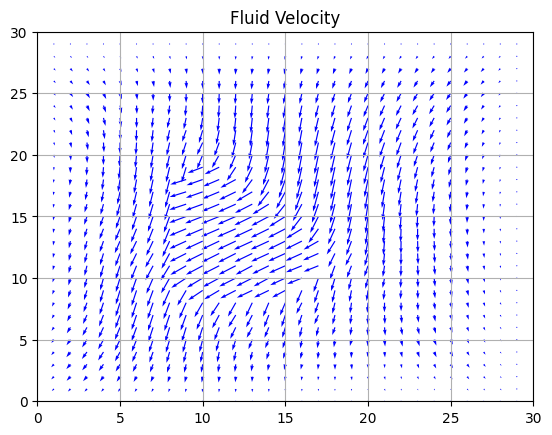

In [23]:
#render fluid flow as vectors with matplotlib

import matplotlib.pyplot as plt 

time_step(dt=0.01)

c = [[(x, y) for x in range(width)] for y in range(height)]
xs = []
ys = []
us = []
vs = []
for y, row in enumerate(c):
    for x, f in enumerate(row):
        xs.append(f[0])
        ys.append(f[1])
        us.append(grid[x][y].flow.x)
        vs.append(grid[x][y].flow.y)


# Plotting Vector Field with QUIVER 
plt.quiver(xs, ys, us, vs, color='b') 
plt.title('Fluid Velocity') 
  
# Setting x, y boundary limits 
plt.xlim(0, width) 
plt.ylim(0, height) 
  
# Show plot with grid 
plt.grid() 
plt.show() 